# Exploratory Data Analysis
Structural Products

In [47]:
#dependencies for EDA
import os
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Importing Dataframes for Exploration

In [4]:
path = "./datasets/"
#check location of files
os.getcwd()

'/Users/jacosta3/OneDrive - University of South Florida/Gerdau Projects/pft/submission'

In [21]:
#structural_dataset: inventory, production, orders and shipments per size/block
structural = pd.read_csv(path+"structural_merged.csv")
#market_indicators: 
indicators = pd.read_excel(path+"market_indicators.xlsx")
#merged monthly/weekly
monthly = pd.read_csv(path+"structuralmonthly_with_indicators.csv")
weekly = pd.read_csv(path+"structuralweekly_with_indicators.csv")

## Shipments

In [38]:
#Changing data types
structural.calendar_day = structural.calendar_day.astype('datetime64')
structural.year = structural.year.astype('object')
structural.month = structural.month.astype('category')
structural.week = structural.week.astype('category')

In [31]:
structural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158270 entries, 0 to 158269
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   calendar_day     158270 non-null  datetime64[ns]
 1   year             158270 non-null  object        
 2   month            158270 non-null  category      
 3   week             158270 non-null  category      
 4   block            158270 non-null  object        
 5   size             158270 non-null  object        
 6   inventory_tons   158270 non-null  float64       
 7   sale_order_tons  158270 non-null  float64       
 8   shipment_tons    158270 non-null  int64         
 9   production_ton   158270 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 10.0+ MB


### Total Yearly Shipments

Text(0.5, 0, 'Tons')

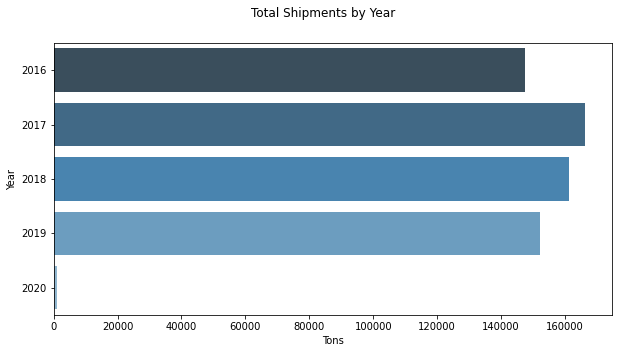

In [37]:
#set fig
fig_dims = (10,5)
fig, ax =plt.subplots(figsize=fig_dims)
fig.suptitle("Total Shipments by Year")

#countplot
sns.barplot(y=[2016,2017,2018,2019,2020], x="shipment_tons", 
            data=structural.resample('Y',on='calendar_day').sum().reset_index(),
            ax=ax, orient="h", palette="Blues_d")
ax.set_ylabel("Year")
ax.set_xlabel("Tons")

### Distribution of Shipments

#### Weekly

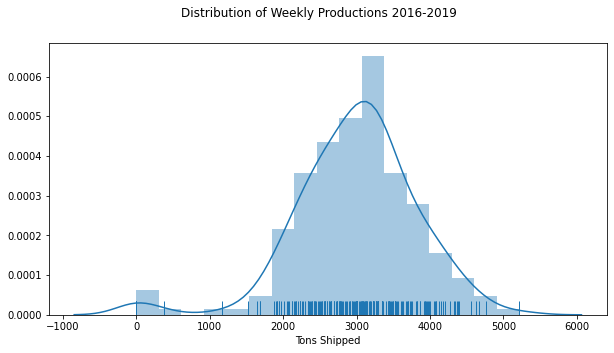

In [41]:
#Weekly Shipment Distribution

#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Weekly Shipments 2016-2019")
#Plotting fig
sns.distplot(structural.resample('W',on='calendar_day').sum().reset_index()['shipment_tons'], rug=True, axlabel="Tons Shipped", ax=ax)

In [53]:
#Stats of Distribution
print("Statistics of Weekly Shipments")
print(structural.resample("W", on="calendar_day").sum()['shipment_tons'].describe())
print("Skew measure:", sp.stats.skew(structural.resample("W", on="calendar_day").sum()['shipment_tons']))
print("Kurtosis measure:", sp.stats.kurtosis(structural.resample("W", on="calendar_day").sum()['shipment_tons'],fisher=False))

Statistics of Weekly Shipments
count     210.000000
mean     2991.719048
std       826.016771
min         0.000000
25%      2534.000000
50%      3050.500000
75%      3468.750000
max      5216.000000
Name: shipment_tons, dtype: float64
Skew measure: -0.7815987016981555
Kurtosis measure: 5.320803159500915


High Kurtosis, while relatively normal skewness seems to indicate heavy tails 

#### Monthly

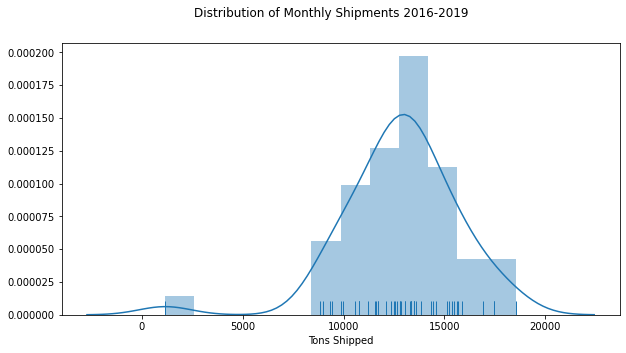

In [42]:
#Monthly Shipment Distribution

#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Distribution of Monthly Shipments 2016-2019")
#Plotting fig
sns.distplot(structural.resample('M',on='calendar_day').sum().reset_index()['shipment_tons'], rug=True, axlabel="Tons Shipped", ax=ax)

In [52]:
#Stats Monthly Distribution
print("Statistics of Weekly Shipments")
print(structural.resample("M", on="calendar_day").sum()['shipment_tons'].describe())
print("Skew measure:", sp.stats.skew(structural.resample("M", on="calendar_day").sum()['shipment_tons']))
print("Kurtosis measure:", sp.stats.kurtosis(structural.resample("M", on="calendar_day").sum()['shipment_tons'],fisher=False))

Statistics of Weekly Shipments
count       49.000000
mean     12821.653061
std       2845.248126
min       1162.000000
25%      11564.000000
50%      13060.000000
75%      14416.000000
max      18543.000000
Name: shipment_tons, dtype: float64
Skew measure: -1.1659350470470122
Kurtosis measure: 7.185241636366115


High Kurtosis, while left tail skewness seems to have increased when we aggregate monthly (we do know that outliers may be present due to tariffs or other economic uncertainty). Need to be looked at more closely  

### Trends 

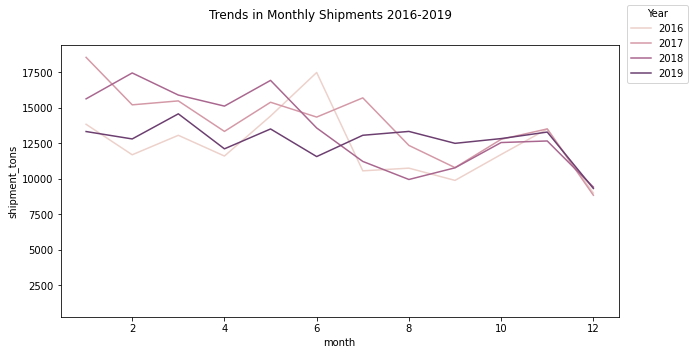

In [67]:
#Creating Fig settings
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle("Trends in Monthly Shipments 2016-2019")

#Plotting fig
sns.lineplot(x='month',
             y='shipment_tons',hue='year', 
             data= structural.groupby(['year','month']).sum().reset_index(),legend=False)

fig.legend(title='Year', labels=[2016,2017,2018,2019])